<a href="https://colab.research.google.com/github/kaeatitayauk/CE888_2020_DSS/blob/master/Lab2/lab2_boostrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [3]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
    bootstrap = np.random.choice(sample,(n_iterations,sample_size),replace = True) # chose sample (may repeat in each select in each set)
    ListMean = []
    for i in range (len(bootstrap)):
      NewSamples = bootstrap[i,:]
      SampleMean = np.mean(NewSamples)
      ListMean.append(SampleMean)
    lower = np.percentile(ListMean, 2.5)
    upper = np.percentile(ListMean, 97.5)
    data_mean = np.mean(bootstrap)	
    return data_mean, lower, upper

C:\Users\nuttachai\anaconda3\envs\ce802\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

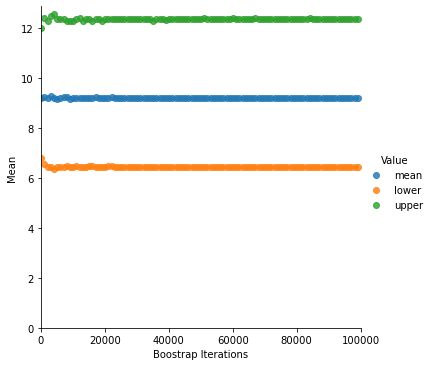

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [5]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
    bootstrap = np.random.choice(sample,(iterations,sample_size),replace = True)
    ListMean = []
    for i in range (len(bootstrap)):
      NewSamples = bootstrap[i,:]
      SampleMean = np.mean(NewSamples)
      ListMean.append(SampleMean)
    lower = np.percentile(ListMean, (100-ci)/2)
    upper = np.percentile(ListMean, ci+((100-ci)/2))
    data_mean = np.mean(bootstrap)
    return data_mean, lower, upper

In [53]:
def boostrap_sd_ci(sample, sample_size, iterations, ci):
    bootstrap = np.random.choice(sample,(iterations,sample_size),replace = True)
    ListMean = []
    for i in range (len(bootstrap)):
      NewSamples = bootstrap[i,:]
      SampleMean = np.std(NewSamples)
      ListMean.append(SampleMean)
    lower = np.percentile(ListMean, (100-ci)/2)
    upper = np.percentile(ListMean, ci+((100-ci)/2))
    data_mean = np.mean(bootstrap)
    return data_mean, lower, upper

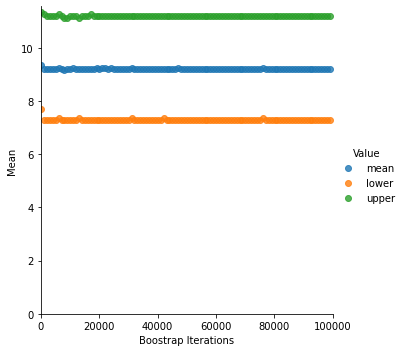

In [6]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

#**Vehicles dataset**
Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed

In [6]:
# Load and visualise the vehicles dataset
df_veh = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
# Note: you can add more cells as needed to organise your code and your plots
# dealing with the missing values
x = df_veh[~np.isnan(df_veh)]
mean = np.mean(x)
mean
new_sample = df_veh.T[1]
new_sample

Current fleet    15.0
New Fleet        27.0
Name: 1, dtype: float64

In [39]:
x

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


C:\Users\nuttachai\anaconda3\envs\ce802\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nuttachai\anaconda3\envs\ce802\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\nuttachai\anaconda3\envs\ce802\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


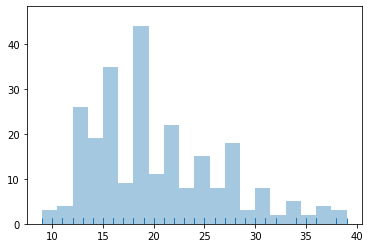

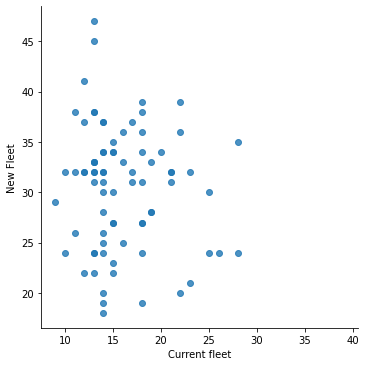

In [7]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!
datacol= df_veh[df_veh.columns[0]].values
sns.distplot(datacol, bins=20,kde=False, rug=True)
sns.lmplot(df_veh.columns[0],df_veh.columns[1],data=df_veh,fit_reg=False)

In [24]:
new_sample

Current fleet    15.0
New Fleet        27.0
Name: 1, dtype: float64

     Boostrap Iterations       Mean  Value
0                    100  21.360000   mean
1                    100  15.000000  lower
2                    100  27.000000  upper
3                   1100  21.016364   mean
4                   1100  15.000000  lower
..                   ...        ...    ...
295                98100  15.000000  lower
296                98100  27.000000  upper
297                99100  21.003935   mean
298                99100  15.000000  lower
299                99100  27.000000  upper

[300 rows x 3 columns]
C:\Users\nuttachai\anaconda3\envs\ce802\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

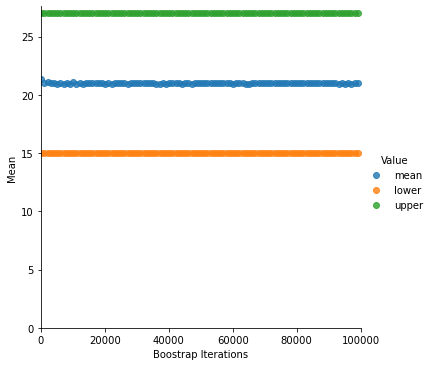

In [8]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(new_sample, new_sample.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
print(df_boot)
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [18]:
boots = []

boot = boostrap_mean_ci(new_sample, new_sample.shape[0], 10000,95)
boots.append([i, boot[0], "mean"])
boots.append([i, boot[1], "lower"])
boots.append([i, boot[2], "upper"])

In [19]:
boots

[[99100, 21.0018, 'mean'], [99100, 15.0, 'lower'], [99100, 27.0, 'upper']]

In [68]:
customer = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')

In [21]:
sale = customer[' Millons of pounds in sales']

In [34]:

boots = []
boot = boostrap_mean_ci(sale, sale.shape[0], 10000,90)
boots.append([i, boot[0], "mean"])
boots.append([i, boot[1], "lower"])
boots.append([i, boot[2], "upper"])

In [35]:
boots

[[99100, 9.210071428571428, 'mean'],
 [99100, 6.857142857142857, 'lower'],
 [99100, 11.785714285714286, 'upper']]

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df.head
#new_fleet=df['New Fleet']
current_fleet= df['Current fleet']
new_fleet = df[df['New Fleet'].notna()]

In [45]:
new_fleet = df[df['New Fleet'].notna()]

In [47]:
new_fleet =new_fleet['New Fleet']

In [64]:
boots = []

boot = boostrap_mean_ci(current_fleet, current_fleet.shape[0], 10000,85)
boots.append([i, boot[0], "mean"])
boots.append([i, boot[1], "lower"])
boots.append([i, boot[2], "upper"])

In [65]:
boots

[[99100, 20.14722048192771, 'mean'],
 [99100, 19.566265060240966, 'lower'],
 [99100, 20.734939759036145, 'upper']]

In [ ]:
def permut_test(sample1, sample2, n_permutations):

    concat = np.concatenate((sample1, sample2))
    perm = np.random.permutation(concat)
    pold = perm[:int(len(perm)/2)]
    pnew = perm[int(len(perm)/2):]
    samples = np.mean(pold) - np.mean(pnew)
    pvalue = 2*np.sum(samples >= np.abs(samples))/n_permutations
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    return pvalue
x = permut_test(current_fleet, new_fleet, 30000)
print(x )